## **UTS Machine Learning**:

Muhammad Alvi Fikri
2141720190
22 / TI-3E

# Segmentasi Gambar dengan Clustering

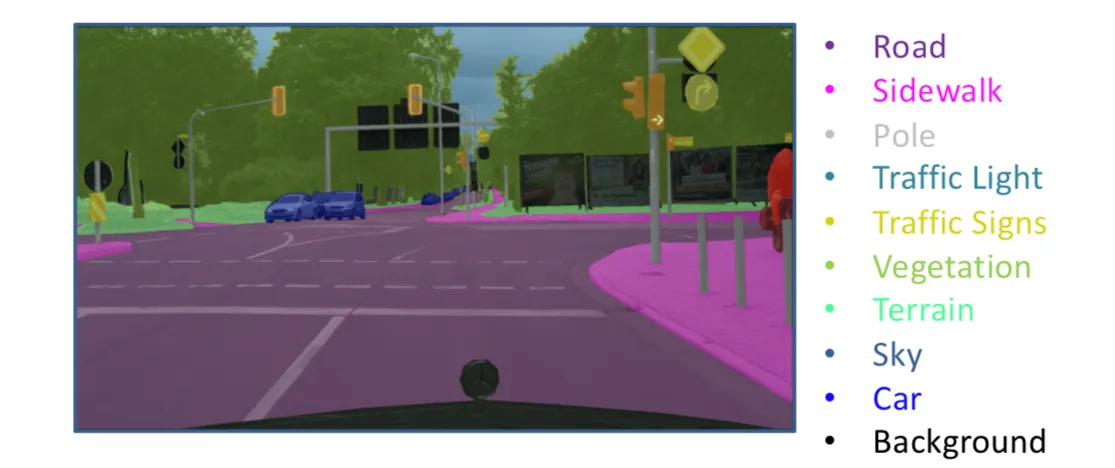

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

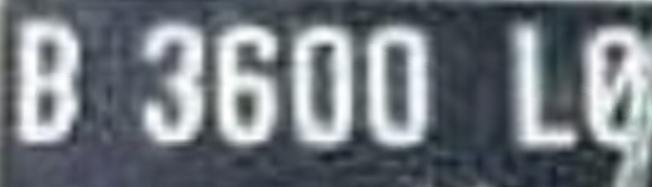

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [194]:
import numpy as np
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/drive')

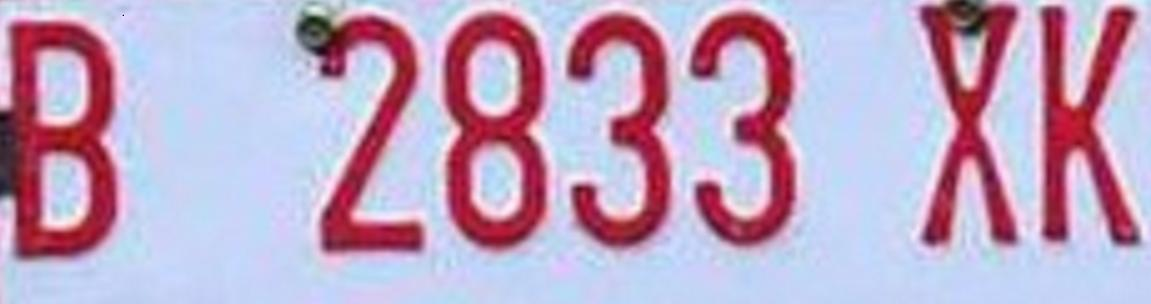

In [175]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/MachineLearning/contoh.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [176]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [177]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [178]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

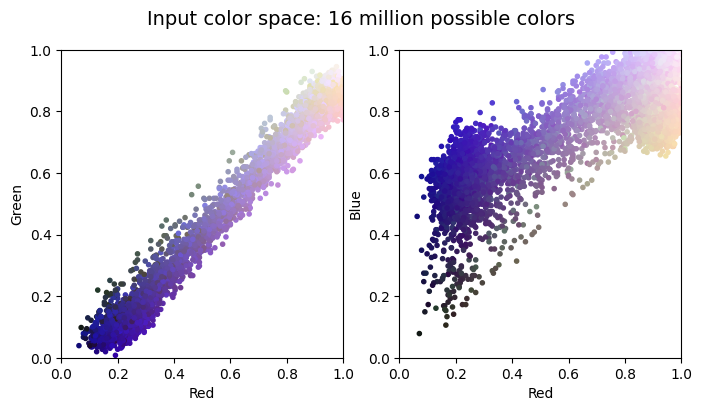

In [179]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

In [181]:
# Definisikan model k-means dengan lebih banyak cluster (misalnya, 16 cluster)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah dari setiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

#Konversi gambar ke ruang warna RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Skalakan nilai-nilai di new_colors ke rentang 0-255 dan konversi ke RGB
img_recolored = (new_colors * 255).astype(np.uint8)
img_recolored = cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, '2-color Image')

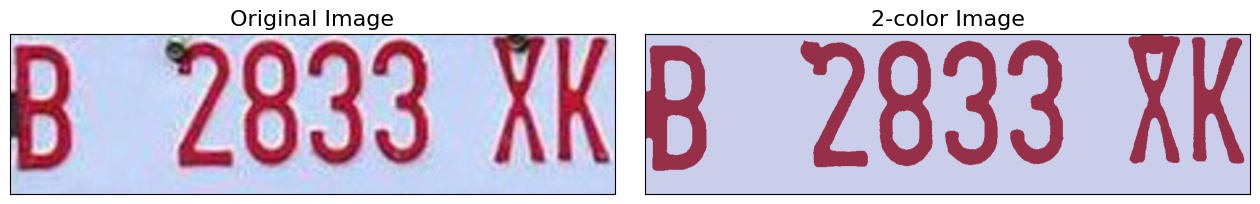

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Jawaban

GAMBAR 1



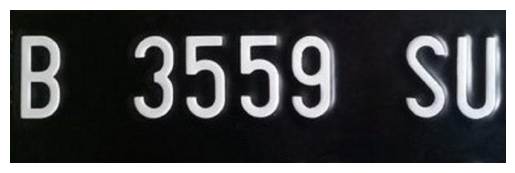


Height: 281
Width: 908
Channels: 3



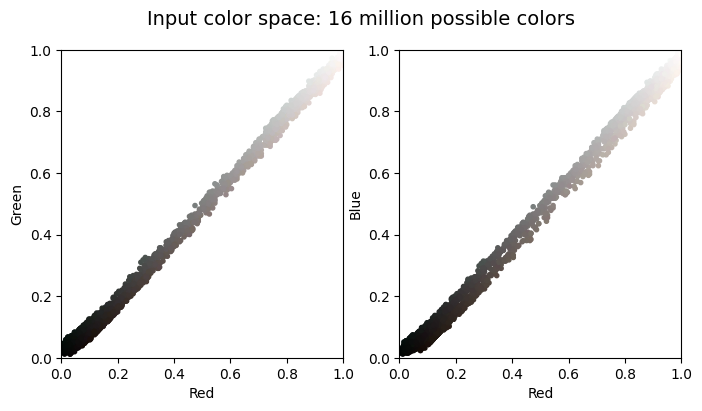

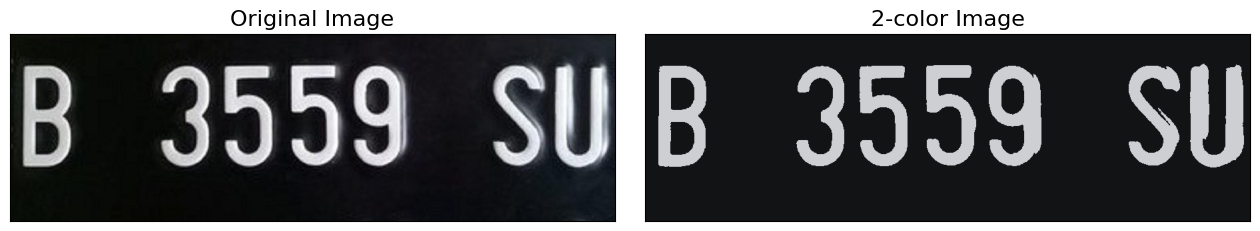


GAMBAR 2



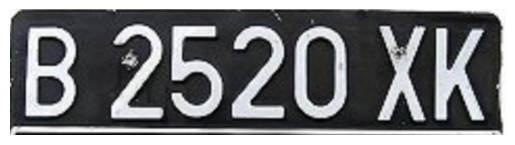


Height: 247
Width: 976
Channels: 3



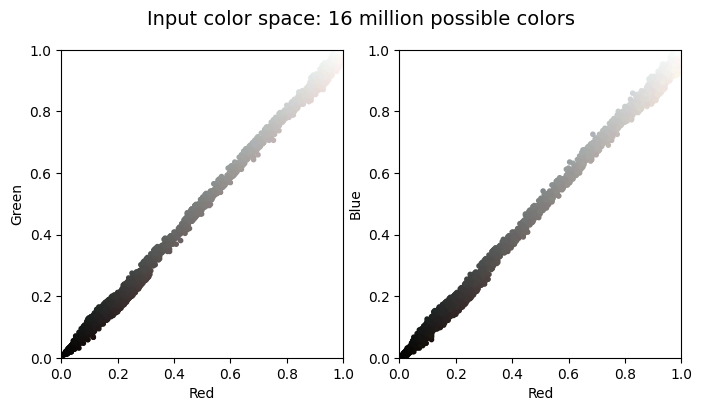

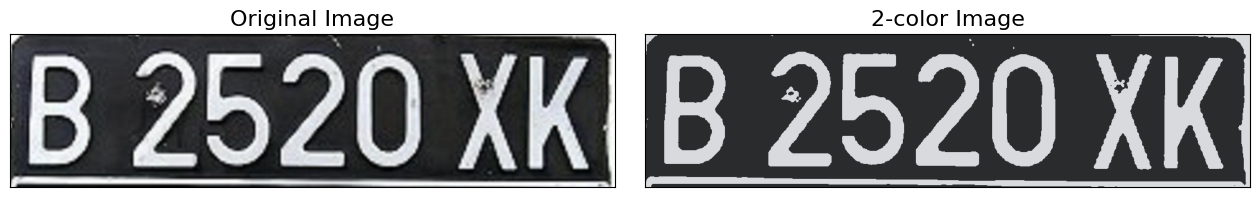


GAMBAR 3



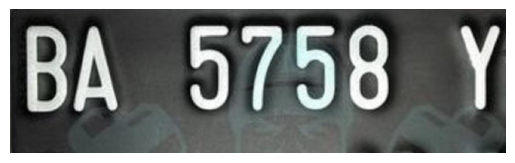


Height: 343
Width: 1183
Channels: 3



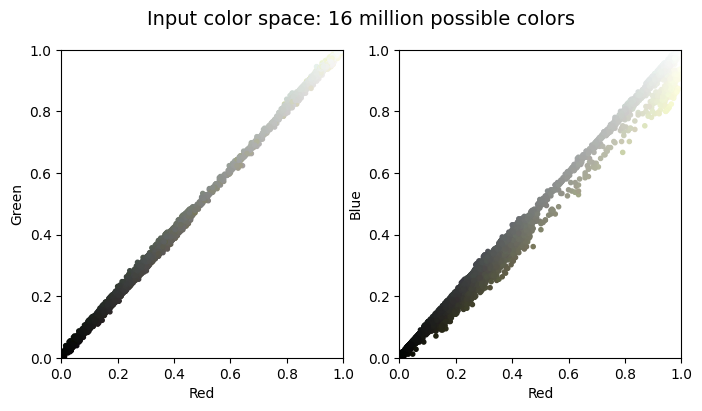

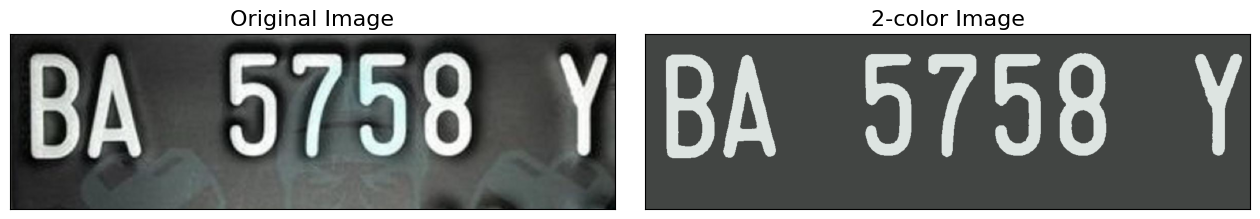


GAMBAR 4



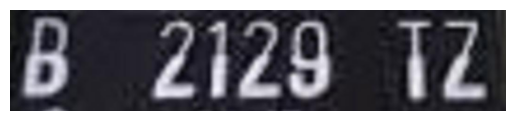


Height: 217
Width: 1064
Channels: 3



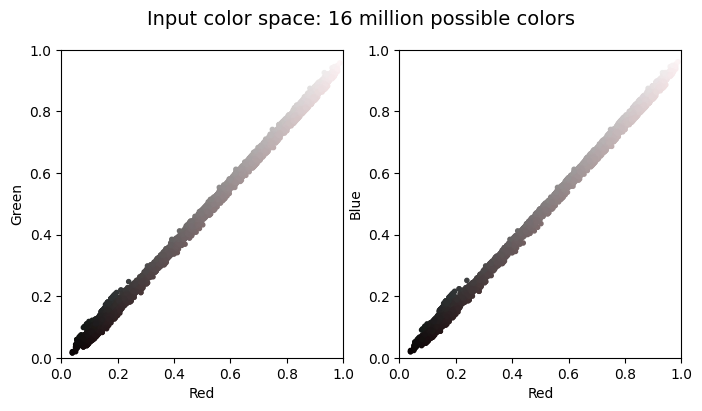

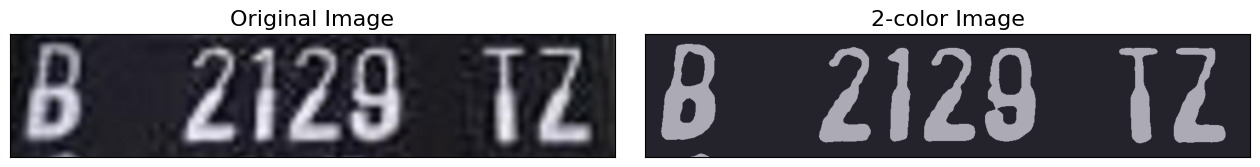


GAMBAR 5



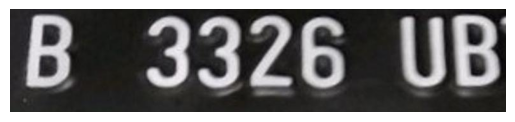


Height: 161
Width: 778
Channels: 3



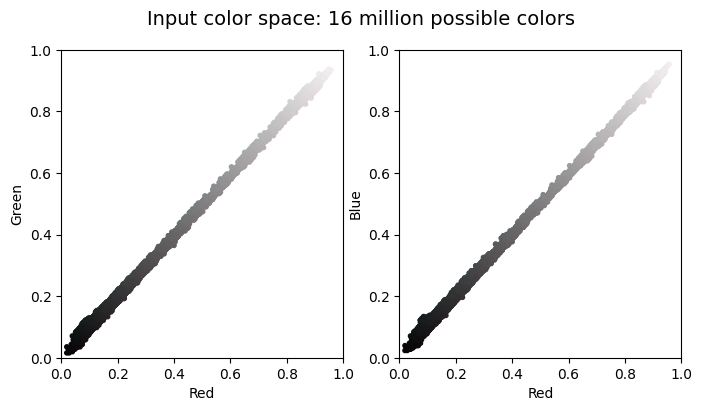

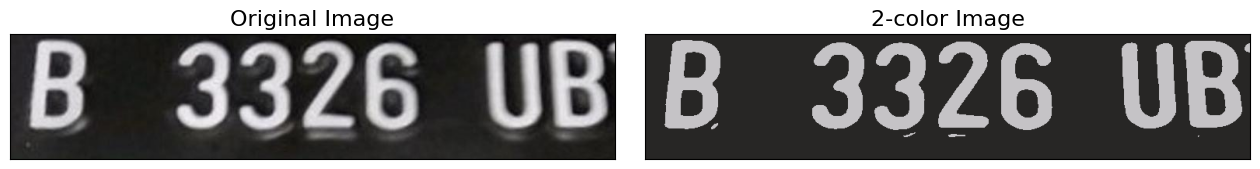

In [211]:
# List dari path gambar-gambar yang akan di-klaster
image_paths = [
    '/content/drive/MyDrive/MachineLearning/1.jpg',
    '/content/drive/MyDrive/MachineLearning/2.jpg',
    '/content/drive/MyDrive/MachineLearning/3.jpg',
    '/content/drive/MyDrive/MachineLearning/4.jpg',
    '/content/drive/MyDrive/MachineLearning/5.jpg'
]

for i, img_path in enumerate(image_paths, start=1):
    print(f"\033[1mGAMBAR {i}\033[0m")
    print()
    # Load Gambar
    img = cv2.imread(img_path)

    # Tampilkan gambar

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print()

    h, w, ch = img.shape
    print("Height:", h)
    print("Width:", w)
    print("Channels:", ch)
    print()

    data = img / 255.0
    data = data.reshape(h * w, ch)
    data.shape

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        # Choose a random subset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

        fig.suptitle(title, size=14)

    plot_pixels(data, title='Input color space: 16 million possible colors')

    # Definisikan model k-means dengan lebih banyak cluster (misalnya, 16 cluster)
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)

    # Fit data ke model k-means
    kmeans.fit(data)

    # Mendapatkan nilai titik tengah dari setiap cluster
    cluster_centers = kmeans.cluster_centers_

    # Tambahkan inisialisasi new_colors
    new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

    # Konversi gambar ke ruang warna RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Skalakan nilai-nilai di new_colors ke rentang 0-255 dan konversi ke RGB
    img_recolored = (new_colors * 255).astype(np.uint8)
    img_recolored = cv2.cvtColor(img_recolored, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar hasil clustering
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(img_rgb)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(img_recolored)
    ax[1].set_title('2-color Image', size=16)
    plt.show()
    print()